In [467]:
#import Pkg 

In [468]:
#Pkg.add("CairoMakie")

In [469]:
#mkpath("Plots")


In [470]:
using CairoMakie

In [471]:
using AbstractAlgebra, Random
using AbstractAlgebra: lift
b=2
F = GF(b)
m = 5
s = 2
ρ = m 
t = m - ρ 
N = b^m

32

In [472]:
S = matrix_space(F, m, m)

Matrix space of 5 rows and 5 columns
  over finite field F_2

Point generation digital and reduced digital nets

In [473]:
badic = collect(Iterators.product(fill(0:b-1, m)...))[:]

32-element Vector{NTuple{5, Int64}}:
 (0, 0, 0, 0, 0)
 (1, 0, 0, 0, 0)
 (0, 1, 0, 0, 0)
 (1, 1, 0, 0, 0)
 (0, 0, 1, 0, 0)
 (1, 0, 1, 0, 0)
 (0, 1, 1, 0, 0)
 (1, 1, 1, 0, 0)
 (0, 0, 0, 1, 0)
 (1, 0, 0, 1, 0)
 ⋮
 (1, 1, 1, 0, 1)
 (0, 0, 0, 1, 1)
 (1, 0, 0, 1, 1)
 (0, 1, 0, 1, 1)
 (1, 1, 0, 1, 1)
 (0, 0, 1, 1, 1)
 (1, 0, 1, 1, 1)
 (0, 1, 1, 1, 1)
 (1, 1, 1, 1, 1)

In [474]:
function norm_coord(v,b)
    v_1 = 0.0
    bf = float(b)
    for i in eachindex(v)
        v_1 += v[i] * bf^(-i)
    end
    return v_1
end


norm_coord (generic function with 1 method)

In [475]:
using Test
@test norm_coord([1 1 0 1],2) == 13/16

Test Passed

In [476]:
# norm_coord( AbstractAlgebra.lift.( C_2*collect(badic[4]) ),2)  # you need to convert Tuples to vectors matrix mult...
# C_r2*collect(badic[4])

# If you compute in a finite field, you need to apply the map from Fq to R to make this computation
# work. This map is called 'lift'. So, you need to apply lift to the vector you want to compute with.

In [477]:
function point_gen(C,n,b)
    v = [norm_coord(AbstractAlgebra.lift.(c*n),b) for c in C]   
    return v

end

point_gen (generic function with 1 method)

In [478]:
#  Use Ctrl+/ to comment out and back
if m == 2
    C_1 = [1 0; 0 1]
    C_2 = [0 1; 1 0]
    C_up = [1 1; 1 0]
elseif m == 3

    C_1 = [1 0 0; 0 1 0; 0 0 1]
    C_2 = [0 0 1; 0 1 0; 1 0 0]
    C_up = [1 1 1; 1 1 0; 1 0 0]
    #C_up = [0 0 1; 1 1 0; 1 0 1] # Observation/conj: all (0,3,2) nets have the same nrt_wts  

elseif m == 4 
    C_1 = [1 0 0 0; 0 1 0 0; 0 0 1 0; 0 0 0 1]
    C_2 = [0 0 0 1; 0 0 1 0; 0 1 0 0; 1 0 0 0]
    C_up = [1 1 1 1; 1 1 1 0; 1 1 0 0; 1 0 0 0]

elseif m == 5 
    C_1 = [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 1 0; 0 0 0 0 1]
    C_2 = [0 0 0 0 1; 0 0 0 1 0; 0 0 1 0 0; 0 1 0 0 0; 1 0 0 0 0]
    C_up = [1 1 1 1 1; 1 1 1 1 0; 1 1 1 0 0; 1 1 0 0 0; 1 0 0 0 0]
end
    
C_1, C_2, C_up  = S(C_1), S(C_2), S(C_up)
C = [C_1,C_2] 

2-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.GFElem{Int64}}}:
 [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 1 0; 0 0 0 0 1]
 [0 0 0 0 1; 0 0 0 1 0; 0 0 1 0 0; 0 1 0 0 0; 1 0 0 0 0]

In [479]:
C_LP = [C_1, C_up]

2-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.GFElem{Int64}}}:
 [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 1 0; 0 0 0 0 1]
 [1 1 1 1 1; 1 1 1 1 0; 1 1 1 0 0; 1 1 0 0 0; 1 0 0 0 0]

In [480]:
collect(C_up)

5×5 Matrix{AbstractAlgebra.GFElem{Int64}}:
 1  1  1  1  1
 1  1  1  1  0
 1  1  1  0  0
 1  1  0  0  0
 1  0  0  0  0

In [481]:
# m = 5 Use Ctrl+/ to comment out
# C_1 = [1 1 1 1 1; 0 1 0 1 0; 0 0 1 1 0; 0 0 0 1 0; 0 0 0 0 1]
# C_2 = [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 1 0; 0 0 0 0 1]
# C_1, C_2  = S(C_1), S(C_2) 
# C = [C_1,C_2]

In [482]:
#point_gen(C,collect(badic[8]),3)

In [483]:
#K_1 = (inv(C_1)*(C_1))

In [484]:
function gen_all_points(C,b)
    badic = collect(Iterators.product(fill(0:b-1, m)...))[:]
    pts = [point_gen(C,collect(n),b) for n in badic]
    return pts
end

gen_all_points (generic function with 1 method)

In [485]:
gen_all_points(C,b)
pts = sort(gen_all_points(C,b))
#pts_shift = [pts[i] .+ 0.02 for i in 1:length(pts)]


32-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.03125, 0.5]
 [0.0625, 0.25]
 [0.09375, 0.75]
 [0.125, 0.125]
 [0.15625, 0.625]
 [0.1875, 0.375]
 [0.21875, 0.875]
 [0.25, 0.0625]
 [0.28125, 0.5625]
 ⋮
 [0.71875, 0.90625]
 [0.75, 0.09375]
 [0.78125, 0.59375]
 [0.8125, 0.34375]
 [0.84375, 0.84375]
 [0.875, 0.21875]
 [0.90625, 0.71875]
 [0.9375, 0.46875]
 [0.96875, 0.96875]

In [486]:
gen_all_points(C_LP,b)
pts_lp = sort(gen_all_points(C_LP,b))

32-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.03125, 0.5]
 [0.0625, 0.75]
 [0.09375, 0.25]
 [0.125, 0.875]
 [0.15625, 0.375]
 [0.1875, 0.125]
 [0.21875, 0.625]
 [0.25, 0.9375]
 [0.28125, 0.4375]
 ⋮
 [0.71875, 0.34375]
 [0.75, 0.03125]
 [0.78125, 0.53125]
 [0.8125, 0.78125]
 [0.84375, 0.28125]
 [0.875, 0.90625]
 [0.90625, 0.40625]
 [0.9375, 0.15625]
 [0.96875, 0.65625]

In [487]:
pts_unq= unique(pts)
nu_pts_unq=length(pts_unq)
pts_j_unq = unique(pts[j][2] for j in 1:b^m)

32-element Vector{BigFloat}:
 0.0
 0.5
 0.25
 0.75
 0.125
 0.625
 0.375
 0.875
 0.0625
 0.5625
 ⋮
 0.90625
 0.09375
 0.59375
 0.34375
 0.84375
 0.21875
 0.71875
 0.46875
 0.96875

In [488]:
# m = 5 Use Ctrl+/ to comment out and back
# w_1 = 0, w_2 =1
# C_cr1 = [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 1 0; 0 0 0 0 1]
# C_cr2 = [0 0 0 0 1; 0 1 0 0 0; 1 0 0 0 0; 0 0 1 0 0; 0 0 0 0 0]
# C_cr1, C_cr2 = S(C_cr1), S(C_cr2)
# C_cr = [C_cr1,C_cr2]

In [489]:
# w_1 = 1, w_2 = 2
# C_cr1 = [1 1 1 1 0; 0 1 0 1 0; 0 0 1 1 0; 0 0 0 1 0; 0 0 0 0 0]
# C_cr2 = [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 0 0; 0 0 0 0 0]
# C_cr1, C_cr2 = S(C_cr1), S(C_cr2)
# C_cr = [C_cr1,C_cr2]

In [490]:
#set_theme!(theme_ggplot2())

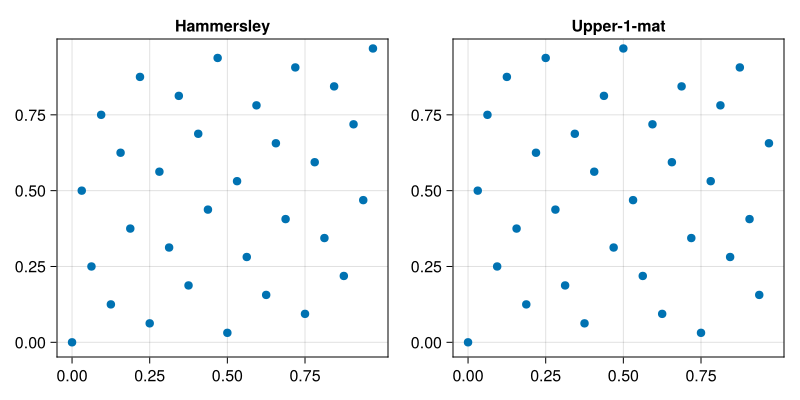

In [491]:
fig = Figure(resolution = (800, 400))

#kwargs = (; xminorticksvisible = true, xminorgridvisible = true)
#xticks = [0.0, 0.5, 1.0], yticks = [0.0, 0.5, 1.0]
#xminorticks = IntervalsBetween(4), xminorticksvisible = true, ygridvisible = false
#limits = (nothing,nothing, -0.05, 1)

#ax = Axis(fig[1,1], title = "", limits = (nothing,nothing, -0.05, 1))
#scatter!( Point2.(pts) )

ax = Axis(fig[1,1],title = "Hammersley",limits = (nothing,nothing, nothing, 1), xticks = [0.0, 0.25, 0.5, 0.75], yticks = [0.0, 0.25, 0.5, 0.75], xminorgridvisible = false, yminorticksvisible = false)
scatter!( Point2.(pts))

#ax = Axis(fig[1,1], title = "(0,4,2)- net", limits = (nothing,nothing, nothing, 1),  xticks = [0.0, 0.25, 0.5, 0.75], xminorticks = IntervalsBetween(4), xminorticksvisible = true, yticks = [0.0, 0.25, 0.5, 0.75],  xminorgridvisible = true, yminorticksvisible = false, ygridvisible = false)
#scatter!( Point2.(pts_shift) )

ax = Axis(fig[1,2], title = "Upper-1-mat", limits = (nothing,nothing, nothing, 1), xticks = [0.0, 0.25, 0.5, 0.75], yticks = [0.0, 0.25, 0.5, 0.75],xminorgridvisible = false, yminorticksvisible = false)
scatter!( Point2.(pts_lp) )

#ax = Axis(fig[2,1], title = "(2,5,2)-row reduced net, w_2 = 2", limits = (nothing,nothing, nothing, 1), xticks = [0.0, 0.25, 0.5, 0.75], yticks = [0.0, 0.25, 0.5, 0.75],xminorgridvisible = false, yminorticksvisible = false)
#scatter!( Point2.(pts_rr_shift) )

#ax = Axis(fig[2,2], title = "(2,5,2)-row reduced net, w_2 = 3", limits = (nothing,nothing, nothing, 1), xticks = [0.0, 0.5, 1.0], yticks = [0.0, 0.5, 1.0],xminorgridvisible = false, yminorticksvisible = false)
#scatter!( Point2.(pts_rrr_shift) )


#ax = Axis(fig[1,2], title = "(2,4,2)-row reduced net, w_2 = 1", limits = (nothing,nothing, nothing, 1),  xticks = [0.0, 0.25, 0.5, 0.75], xminorticks = IntervalsBetween(2), xminorticksvisible = true, yticks = [0.0, 0.25, 0.5, 0.75],  xminorgridvisible = true, yminorticksvisible = false, ygridvisible = false)
#scatter!( Point2.(pts_cr_shift) )

#ax = Axis(fig[1,3], title = "(2,4,2)-row reduced net, w_2 = 2", limits = (nothing,nothing, nothing, 1),  xticks = [0.0, 0.25, 0.5, 0.75], xminorticks = IntervalsBetween(2), xminorticksvisible = true, yticks = [0.0, 0.25, 0.5, 0.75],  xminorgridvisible = true, yminorticksvisible = false, ygridvisible = false)
#scatter!( Point2.(pts_rr_shift) )

#ax = Axis(fig[1,3], title = "col-row reduced point set")
#scatter!( Point2.(pts_rr) )

#save("Plots/Digital_net_t2_w123_rowred_m5_shift.png", fig)
#save("Plots/Digital_net_t2_w123_rowred_m5_shift.svg", fig)
fig

Computing the NRT-weight and Dual space

In [492]:
1+2^5+2^10+2^15

33825

In [493]:
dual_badic = collect(Iterators.product(fill(0:b-1, m*s)...))[:]

1024-element Vector{NTuple{10, Int64}}:
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
 (1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
 (0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
 (1, 1, 0, 0, 0, 0, 0, 0, 0, 0)
 (0, 0, 1, 0, 0, 0, 0, 0, 0, 0)
 (1, 0, 1, 0, 0, 0, 0, 0, 0, 0)
 (0, 1, 1, 0, 0, 0, 0, 0, 0, 0)
 (1, 1, 1, 0, 0, 0, 0, 0, 0, 0)
 (0, 0, 0, 1, 0, 0, 0, 0, 0, 0)
 (1, 0, 0, 1, 0, 0, 0, 0, 0, 0)
 ⋮
 (1, 1, 1, 0, 1, 1, 1, 1, 1, 1)
 (0, 0, 0, 1, 1, 1, 1, 1, 1, 1)
 (1, 0, 0, 1, 1, 1, 1, 1, 1, 1)
 (0, 1, 0, 1, 1, 1, 1, 1, 1, 1)
 (1, 1, 0, 1, 1, 1, 1, 1, 1, 1)
 (0, 0, 1, 1, 1, 1, 1, 1, 1, 1)
 (1, 0, 1, 1, 1, 1, 1, 1, 1, 1)
 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1)
 (1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

In [494]:
function nrt_wt(v,b,m,s)
    wt = 0
    for i in 0:m:(m*s -1)
        for j in m:-1:1         #reverse(1:m)
            if v[i+j] != 0
                wt += j
                break
            end
        end
    end
    return wt
end

nrt_wt (generic function with 1 method)

In [495]:
nrt_wt.(dual_badic,b,m,s)

1024-element Vector{Int64}:
  0
  1
  2
  2
  3
  3
  3
  3
  4
  4
  ⋮
 10
 10
 10
 10
 10
 10
 10
 10
 10

In [496]:
wt_dict = Dict()
    for x in dual_badic
        wt = nrt_wt(x,b,m,s)
        if haskey(wt_dict,wt)
            push!(wt_dict[wt],x)
        else 
            wt_dict[wt] = [x]
        end
    end 

In [497]:
#Test for m=2
zeros(Int64,1,2) == [0 0]


true

In [498]:
function dual_C(M,b,m,s)
    dual_elt = []
    for n in dual_badic
        if transpose(collect(n))*M == zeros(Int64,1,m)
            dual_elt = push!(dual_elt, n)
        end
    end
    return dual_elt
end

dual_C (generic function with 1 method)

In [499]:
M = [collect(C_1);collect(C_2)]
# transpose(collect(dual_badic[64]))*M == [0 0 0] 

10×5 Matrix{AbstractAlgebra.GFElem{Int64}}:
 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1
 0  0  0  0  1
 0  0  0  1  0
 0  0  1  0  0
 0  1  0  0  0
 1  0  0  0  0

In [500]:
M_lp = [collect(C_1);collect(C_up)]

10×5 Matrix{AbstractAlgebra.GFElem{Int64}}:
 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1
 1  1  1  1  1
 1  1  1  1  0
 1  1  1  0  0
 1  1  0  0  0
 1  0  0  0  0

In [501]:
dual_pts = dual_C(M,b,m,s)

32-element Vector{Any}:
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
 (0, 0, 0, 0, 1, 1, 0, 0, 0, 0)
 (0, 0, 0, 1, 0, 0, 1, 0, 0, 0)
 (0, 0, 0, 1, 1, 1, 1, 0, 0, 0)
 (0, 0, 1, 0, 0, 0, 0, 1, 0, 0)
 (0, 0, 1, 0, 1, 1, 0, 1, 0, 0)
 (0, 0, 1, 1, 0, 0, 1, 1, 0, 0)
 (0, 0, 1, 1, 1, 1, 1, 1, 0, 0)
 (0, 1, 0, 0, 0, 0, 0, 0, 1, 0)
 (0, 1, 0, 0, 1, 1, 0, 0, 1, 0)
 ⋮
 (1, 0, 1, 1, 1, 1, 1, 1, 0, 1)
 (1, 1, 0, 0, 0, 0, 0, 0, 1, 1)
 (1, 1, 0, 0, 1, 1, 0, 0, 1, 1)
 (1, 1, 0, 1, 0, 0, 1, 0, 1, 1)
 (1, 1, 0, 1, 1, 1, 1, 0, 1, 1)
 (1, 1, 1, 0, 0, 0, 0, 1, 1, 1)
 (1, 1, 1, 0, 1, 1, 0, 1, 1, 1)
 (1, 1, 1, 1, 0, 0, 1, 1, 1, 1)
 (1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

In [502]:
dual_pts_lp = dual_C(M_lp,b,m,s)

32-element Vector{Any}:
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
 (1, 1, 1, 1, 1, 1, 0, 0, 0, 0)
 (1, 1, 1, 1, 0, 0, 1, 0, 0, 0)
 (0, 0, 0, 0, 1, 1, 1, 0, 0, 0)
 (1, 1, 1, 0, 0, 0, 0, 1, 0, 0)
 (0, 0, 0, 1, 1, 1, 0, 1, 0, 0)
 (0, 0, 0, 1, 0, 0, 1, 1, 0, 0)
 (1, 1, 1, 0, 1, 1, 1, 1, 0, 0)
 (1, 1, 0, 0, 0, 0, 0, 0, 1, 0)
 (0, 0, 1, 1, 1, 1, 0, 0, 1, 0)
 ⋮
 (0, 1, 1, 0, 1, 1, 1, 1, 0, 1)
 (0, 1, 0, 0, 0, 0, 0, 0, 1, 1)
 (1, 0, 1, 1, 1, 1, 0, 0, 1, 1)
 (1, 0, 1, 1, 0, 0, 1, 0, 1, 1)
 (0, 1, 0, 0, 1, 1, 1, 0, 1, 1)
 (1, 0, 1, 0, 0, 0, 0, 1, 1, 1)
 (0, 1, 0, 1, 1, 1, 0, 1, 1, 1)
 (0, 1, 0, 1, 0, 0, 1, 1, 1, 1)
 (1, 0, 1, 0, 1, 1, 1, 1, 1, 1)

In [503]:
nrt_wt.(dual_pts,b,m,s)

32-element Vector{Int64}:
  0
  6
  6
  7
  6
  8
  7
  8
  6
  9
  ⋮
 10
  7
 10
  9
 10
  8
 10
  9
 10

In [504]:
nrt_wt.(dual_pts_lp,b,m,s)

32-element Vector{Int64}:
  0
  6
  6
  7
  6
  8
  7
  8
  6
  9
  ⋮
 10
  7
 10
  9
 10
  8
 10
  9
 10

In [505]:
nrt_wt.(dual_pts,b,m,s) == nrt_wt.(dual_pts_lp,b,m,s)

true

In [506]:
function total_wt(v,b,m,s)
    wt_t = 0
    for i in 0:m:(m*s -1)
        for j in 1:m       
            if v[i+j] != 0
                    wt_t += j
            end
        end
    end
    return wt_t
end

total_wt (generic function with 1 method)

In [507]:
function sumtotal_wt(W)
    wt_total = 0
    for i in 1:length(W)
        wt_total += W[i]
    end
    return wt_total
end

sumtotal_wt (generic function with 1 method)

In [522]:
W_1 = total_wt.(dual_pts,b,m,s)

32-element Vector{Int64}:
  0
  6
  6
 12
  6
 12
 12
 18
  6
 12
  ⋮
 24
 12
 18
 18
 24
 18
 24
 24
 30

In [528]:
println(W_1)

[0, 6, 6, 12, 6, 12, 12, 18, 6, 12, 12, 18, 12, 18, 18, 24, 6, 12, 12, 18, 12, 18, 18, 24, 12, 18, 18, 24, 18, 24, 24, 30]


In [509]:
W_2 = total_wt.(dual_pts_lp,b,m,s)

32-element Vector{Int64}:
  0
 16
 12
  8
  9
 13
  9
 17
  7
 17
  ⋮
 21
 11
 23
 19
 19
 16
 24
 20
 24

In [510]:
sumtotal_wt(W_1)

480

In [511]:
sumtotal_wt(W_2)

480

In [512]:
wt_dict_dual = Dict()
    for x in dual_pts
        wt = nrt_wt(x,b,m,s)
        if haskey(wt_dict_dual,wt)
            push!(wt_dict_dual[wt],x)
        else 
            wt_dict_dual[wt] = [x]
        end
    end 

In [513]:
#wt_dict_dual[8]

In [514]:
wt_dict_dual_lp = Dict()
    for x in dual_pts_lp
        wt = nrt_wt(x,b,m,s)
        if haskey(wt_dict_dual_lp,wt)
            push!(wt_dict_dual_lp[wt],x)
        else 
            wt_dict_dual_lp[wt] = [x]
        end
    end 

In [515]:
#wt_dict_dual_lp[8]